In [287]:
import pandas as pd
import datetime as dt 
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import requests

In [288]:
base_url = 'https://gbfs.capitalbikeshare.com/gbfs/gbfs.json'

def main_request(url):
    r = requests.get(base_url)
    data = r.json()

    return data

data = main_request(base_url)

In [291]:
def station_info(data):
    
    r = requests.get(data['data']['en']['feeds'][1]['url'])
    station_info = r.json()

    return station_info

stations = station_info(data)

def parse_station_info(stations_json):
    station_list = []
    last_update = stations_json['last_updated']
    for station in range(len(stations_json['data']['stations'])):
        region_id = stations_json['data']['stations'][station]['region_id']
        has_kiosk = stations_json['data']['stations'][station]['has_kiosk']
        station_type = stations_json['data']['stations'][station]['station_type']
        adress = stations_json['data']['stations'][station]['name']
        capacity = stations_json['data']['stations'][station]['capacity']
        latitude = stations_json['data']['stations'][station]['lat']
        longitude = stations_json['data']['stations'][station]['lon']
        rental_methods = stations_json['data']['stations'][station]['rental_methods']
        station_id = stations_json['data']['stations'][station]['station_id']
        legacy_id = stations_json['data']['stations'][station]['legacy_id']

        station_dict = {
            'region_id' : region_id,
            'adress' : adress,
            'latitude': latitude,
            'longitude' : longitude,
            'type' : station_type,
            'has_kiosk' : has_kiosk,
            'capacity' : capacity,
            'rental_methods' : rental_methods,
            'station_id' : station_id,
            'legacy_id' : legacy_id,
            'last_updated' : dt.datetime.fromtimestamp(last_update)
        }

        station_list.append(station_dict)
        

    return station_list

    

In [314]:
df_stations_realtime = pd.DataFrame(parse_station_info(station_info(main_request(base_url))))

In [315]:
df_stations_realtime.head(10)

,region_id,adress,latitude,longitude,type,has_kiosk,capacity,rental_methods,station_id,legacy_id,last_updated
0,42,7th & Monroe St NE,38.932243,-76.996133,classic,True,15,"[KEY, CREDITCARD]",066fd95e-0d37-4eea-a027-88c04277bb9d,066fd95e-0d37-4eea-a027-88c04277bb9d,2023-07-13 08:51:08
1,133,1301 McCormick Dr / Wayne K. Curry Admin Bldg,38.908391,-76.843263,classic,True,15,"[KEY, CREDITCARD]",987decdd-577d-4614-a6eb-307944a634b4,521,2023-07-13 08:51:08
2,104,Soapstone Dr Convenience Center,38.930510,-77.345874,classic,True,12,"[KEY, CREDITCARD]",85c2fb24-d241-4550-8968-2cdf85462af7,692,2023-07-13 08:51:08
3,42,4th & Florida Ave NE,38.907316,-77.000698,classic,True,19,"[KEY, CREDITCARD]",21cdfe0d-71ad-4302-a003-3cfc0d355af9,708,2023-07-13 08:51:08
4,41,N Lynn St & Fairfax Dr,38.893860,-77.070862,classic,True,15,"[KEY, CREDITCARD]",0826402c-1f3f-11e7-bf6b-3863bb334450,448,2023-07-13 08:51:08
5,133,The Mall at Prince Georges,38.968842,-76.954171,classic,True,17,"[KEY, CREDITCARD]",d34d2639-ee43-4892-818f-f01116813744,597,2023-07-13 08:51:08
6,40,Mount Vernon Ave & Four Mile Run Park,38.843422,-77.064016,classic,True,15,"[KEY, CREDITCARD]",08262494-1f3f-11e7-bf6b-3863bb334450,412,2023-07-13 08:51:08
7,44,Wheaton Metro / Georgia Ave & Reedie Dr,39.038424,-77.051020,classic,True,19,"[KEY, CREDITCARD]",08265124-1f3f-11e7-bf6b-3863bb334450,462,2023-07-13 08:51:08
8,152,S Maple Ave & S Washington St,38.879720,-77.178408,classic,True,12,"[KEY, CREDITCARD]",5e571279-84a3-4dd6-9ee5-6a834e4c624a,578,2023-07-13 08:51:08
9,104,Becontree Ln & Goldenrain Ct,38.966848,-77.329282,classic,True,12,"[KEY, CREDITCARD]",e976c0ab-bc21-42b3-a2c2-b90def6f54f4,677,2023-07-13 08:51:08


In [295]:
resp = requests.get(jsobject['data']['en']['feeds'][3]['url'])
bike_data = resp.json()

In [296]:
print(bike_data['data']['bikes'][0])

{'type': 'electric_bike', 'is_reserved': 0, 'name': 'ab65b90b5f79fc9aa4f294e84da1c5a9', 'fusion_lat': 0, 'rental_uris': {'ios': 'https://dc.lft.to/lastmile_qr_scan', 'android': 'https://dc.lft.to/lastmile_qr_scan'}, 'is_disabled': 0, 'fusion_lon': 0, 'bike_id': 'ab65b90b5f79fc9aa4f294e84da1c5a9', 'lon': -77.0139105, 'lat': 38.942307}


In [297]:
bike_list = []
for bike in range(len(bike_data['data']['bikes'])):
    bike_id = bike_data['data']['bikes'][bike]['bike_id']
    latitude = bike_data['data']['bikes'][bike]['lat']
    longitude = bike_data['data']['bikes'][bike]['lon']
    longitude = bike_data['data']['bikes'][bike]['lon']
    type = bike_data['data']['bikes'][bike]['type']
    reserved = bike_data['data']['bikes'][bike]['is_reserved']
    disabled = bike_data['data']['bikes'][bike]['is_disabled']
    bike_dict = {
        'bike_id' : bike_id,
        'latitude': latitude,
        'longitude' : longitude,
        'bike_type' : type,
        'reserved' : reserved,
        'disabled' : disabled
    }
    bike_list.append(bike_dict)
print(bike_list)

[{'bike_id': 'ab65b90b5f79fc9aa4f294e84da1c5a9', 'latitude': 38.942307, 'longitude': -77.0139105, 'bike_type': 'electric_bike', 'reserved': 0, 'disabled': 0}, {'bike_id': '0b0ef9bf44aaf9a11252a14e88750404', 'latitude': 38.924211, 'longitude': -76.997047, 'bike_type': 'electric_bike', 'reserved': 0, 'disabled': 0}, {'bike_id': 'a6cb19b3661f31a72f38690c3f07bc1e', 'latitude': 38.924257833333336, 'longitude': -76.95553383333333, 'bike_type': 'electric_bike', 'reserved': 0, 'disabled': 0}, {'bike_id': 'cfe4baf38c043e448f8bfe4d5dc6e6c1', 'latitude': 38.91588816666667, 'longitude': -76.9772865, 'bike_type': 'electric_bike', 'reserved': 0, 'disabled': 0}, {'bike_id': '93a4c3359e254ebc65130a94621e85f1', 'latitude': 38.84532816666667, 'longitude': -77.13170016666666, 'bike_type': 'electric_bike', 'reserved': 0, 'disabled': 0}, {'bike_id': '0a7364c3b8aabeca30083eef212af2ba', 'latitude': 38.88878066666667, 'longitude': -77.02869016666666, 'bike_type': 'electric_bike', 'reserved': 0, 'disabled': 0}

In [298]:
bike_list[2]

{'bike_id': 'a6cb19b3661f31a72f38690c3f07bc1e',
 'latitude': 38.924257833333336,
 'longitude': -76.95553383333333,
 'bike_type': 'electric_bike',
 'reserved': 0,
 'disabled': 0}

In [299]:
bike_data['data']['bikes'][1]

{'type': 'electric_bike',
 'is_reserved': 0,
 'name': '0b0ef9bf44aaf9a11252a14e88750404',
 'fusion_lat': 0,
 'rental_uris': {'ios': 'https://dc.lft.to/lastmile_qr_scan',
  'android': 'https://dc.lft.to/lastmile_qr_scan'},
 'is_disabled': 0,
 'fusion_lon': 0,
 'bike_id': '0b0ef9bf44aaf9a11252a14e88750404',
 'lon': -76.997047,
 'lat': 38.924211}

In [300]:
df_data = pd.DataFrame(bike_data['data'])

In [301]:
df_bikes = pd.DataFrame(bike_data['data']['bikes'])

In [302]:
df_bikes.rename(columns={'lon':'Longitude','lat':'Latitude'}, inplace=True)
crs = {'init':'epsg:4326'}

In [303]:
df_bikes.dtypes

type            object
is_reserved      int64
name            object
fusion_lat       int64
rental_uris     object
is_disabled      int64
fusion_lon       int64
bike_id         object
Longitude      float64
Latitude       float64
dtype: object

In [304]:
df_bikes.head()

,type,is_reserved,name,fusion_lat,rental_uris,is_disabled,fusion_lon,bike_id,Longitude,Latitude
0,electric_bike,0,ab65b90b5f79fc9aa4f294e84da1c5a9,0,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0,0,ab65b90b5f79fc9aa4f294e84da1c5a9,-77.013910,38.942307
1,electric_bike,0,0b0ef9bf44aaf9a11252a14e88750404,0,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0,0,0b0ef9bf44aaf9a11252a14e88750404,-76.997047,38.924211
2,electric_bike,0,a6cb19b3661f31a72f38690c3f07bc1e,0,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0,0,a6cb19b3661f31a72f38690c3f07bc1e,-76.955534,38.924258
3,electric_bike,0,cfe4baf38c043e448f8bfe4d5dc6e6c1,0,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0,0,cfe4baf38c043e448f8bfe4d5dc6e6c1,-76.977287,38.915888
4,electric_bike,0,93a4c3359e254ebc65130a94621e85f1,0,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0,0,93a4c3359e254ebc65130a94621e85f1,-77.131700,38.845328


In [305]:
street_map = gpd.read_file('ignore/tl_2018_11001_roads/tl_2018_11001_roads.shp')

<AxesSubplot:>

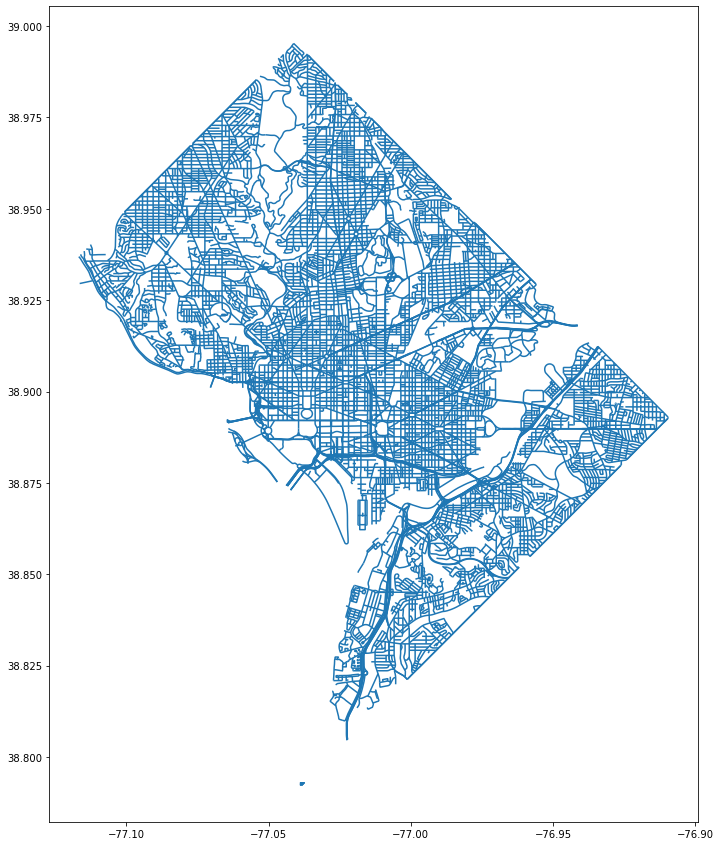

In [306]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [307]:
geometry = [Point(xy) for xy in zip(df_bikes['Longitude'], df_bikes['Latitude'])]

In [308]:
geometry[:3]

[<POINT (-77.014 38.942)>, <POINT (-76.997 38.924)>, <POINT (-76.956 38.924)>]

In [309]:
geo_df = gpd.GeoDataFrame(df_bikes, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/Users/maxremme/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,type,is_reserved,name,fusion_lat,rental_uris,is_disabled,fusion_lon,bike_id,Longitude,Latitude,geometry
0,electric_bike,0,ab65b90b5f79fc9aa4f294e84da1c5a9,0,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0,0,ab65b90b5f79fc9aa4f294e84da1c5a9,-77.013910,38.942307,POINT (-77.01391 38.94231)
1,electric_bike,0,0b0ef9bf44aaf9a11252a14e88750404,0,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0,0,0b0ef9bf44aaf9a11252a14e88750404,-76.997047,38.924211,POINT (-76.99705 38.92421)
2,electric_bike,0,a6cb19b3661f31a72f38690c3f07bc1e,0,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0,0,a6cb19b3661f31a72f38690c3f07bc1e,-76.955534,38.924258,POINT (-76.95553 38.92426)
3,electric_bike,0,cfe4baf38c043e448f8bfe4d5dc6e6c1,0,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0,0,cfe4baf38c043e448f8bfe4d5dc6e6c1,-76.977287,38.915888,POINT (-76.97729 38.91589)
4,electric_bike,0,93a4c3359e254ebc65130a94621e85f1,0,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0,0,93a4c3359e254ebc65130a94621e85f1,-77.131700,38.845328,POINT (-77.13170 38.84533)


In [310]:
geo_df = geo_df.to_crs(street_map.crs)

In [311]:
geo_df.isna().sum()

type           0
is_reserved    0
name           0
fusion_lat     0
rental_uris    0
is_disabled    0
fusion_lon     0
bike_id        0
Longitude      0
Latitude       0
geometry       0
dtype: int64

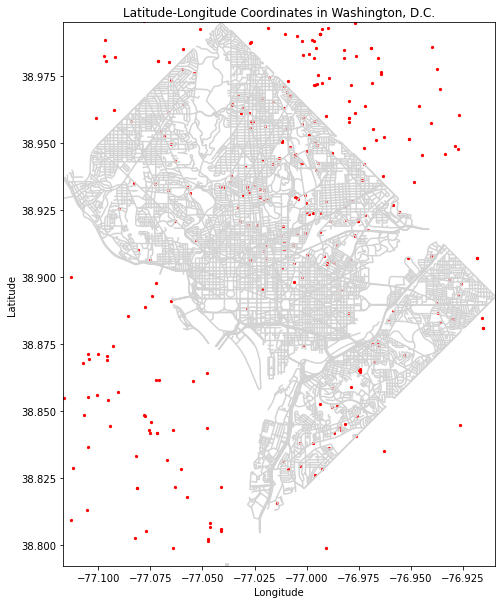

In [312]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Washington, D.C. map
street_map.plot(ax=ax, color='lightgray')

# Plot the GeoDataFrame on the axis
geo_df.plot(ax=ax, marker='o', color='red', markersize=5)

# Set the plot extent to Washington, D.C.
ax.set_xlim(street_map.total_bounds[0], street_map.total_bounds[2])
ax.set_ylim(street_map.total_bounds[1], street_map.total_bounds[3])

# Customize the map appearance (optional)
ax.set_title("Latitude-Longitude Coordinates in Washington, D.C.")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the map
plt.show()